In [705]:
##############################################################################################################################
#
#    Data Analysis on Risk of Flooding, Erosion, and Climate Impacts
#    (Sea Level Rise, Increased Rainfall Intensity)
#    on Roadways in Boston, MA, USA.
#    Zachary X. Chen, Boston Latin School
#    Jack G. Payette, MIT
#
################################################################################################################################

In [ ]:
# UTF-8 Python Python 3.7.4
# The following code needs to be run with at least python 3.5 or greater and a conda/virtual env environment:
# PIP CONDA or BREW are needed in order to install the required:
# 'semopy','seaborn','sklearn','scipy','pandas' packages

In [ ]:
### Check python version

In [95]:
!python3 --version

Python 3.7.4


In [5]:
# Use conda or python-in-python pip or homebrew brew to install semopy (and dependent packages)
!pip install semopy

In [6]:
# Import required packages
# Use aliaes for seaborn = sns, pandas = pd
import semopy
import seaborn as sns
import scipy
import sklearn
import pandas as pd

# learn more here:
# https://semopy.com/syntax.html
# https://seaborn.pydata.org/examples/scatterplot_matrix.html
# https://pandas.pydata.org/docs/index.html

In [ ]:
# You 

In [33]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Linux command to print the working directory

In [706]:
!ls

Archive
Road_elevation_risk_data - Boston_Roads.csv
Road_elevation_risk_data.csv
SEM_flood_risk_roadways_data_analysis.ipynb


In [707]:
# Read in .CSV File from previous Google Spreadsheet of Manually Integrated Roadway Data

In [708]:
Roads = pd.read_csv('Road_elevation_risk_data.csv')

In [709]:
# Print(Roads)

In [710]:
Roads

,Road,State,City,Region,Distance_from_shoreline,Min_elevation_ft_google,Avg_elevation,Max_elevation_ft_google,Max_slope_pct_1_google,Max_slope_pct_2_google,...,Cost_per_mile_byCity,RUSLE_output_pound_per_sqft_per_year,Width_ft,RUSLE_output_tons_hectare_year,Length_ft,RUSLE_LS_value,Avg_abs_of_both_slopes,RUSLE_R_value,RUSLE_K_value,R_value_from_address
0,Atlantic_Avenue,MA,Boston,Seaport,CLOSE,12.0,13.0,14.0,6.9,-8.0,...,"$345,947",5.190037,35.3,113.039001,899.0,0.26,1.300,137,0.0001,406 Atlantic Ave
1,Long_Wharf,MA,Boston,Seaport,CLOSE,5.0,8.0,9.0,4.5,-4.1,...,"$345,947",4.130154,34.5,89.954748,732.0,0.26,0.800,137,0.0001,1 Long Wharf
2,Harbor Walk,MA,Boston,Seaport,CLOSE,8.0,9.0,11.0,23.9,-20.4,...,"$345,947",1.951303,21.4,42.499373,604.0,0.24,0.895,137,0.0001,1 Harbor Walk
3,Congress_St,MA,Boston,Seaport,CLOSE,6.0,7.0,11.0,1.9,-21.6,...,"$345,947",5.285619,48.9,115.120771,716.0,0.24,0.850,137,0.0001,1 Congress Street
4,Seaport_Blvd,MA,Boston,Seaport,CLOSE,7.0,10.0,19.0,32.9,-9.7,...,"$345,947",41.141847,74.0,896.069434,3273.6,0.27,1.300,137,0.0001,1 Seaport Blvd
5,Summer st,MA,Boston,Seaport,CLOSE,11.0,13.0,16.0,5.0,-5.7,...,"$345,947",11.028574,69.9,240.202333,929.0,0.27,1.100,137,0.0001,1 Summer St
6,A_st,MA,Boston,Seaport,CLOSE,7.0,9.0,16.0,34.4,-34.6,...,"$345,947",32.228378,59.9,701.934077,3168.0,0.27,1.400,137,0.0001,1 A St
7,Tremont_St,MA,Boston,Downtown,FAR,8.0,12.0,18.0,1.7,-6.4,...,"$345,947",10.569646,63.7,230.206895,977.0,0.27,1.000,137,0.0001,1 Tremont St
8,Storrow_Dr,MA,Boston,Downtown,FAR,2.0,4.0,10.0,6.3,-5.8,...,"$345,947",17.863317,47.4,389.063039,2219.0,0.27,1.350,137,0.0001,1 Storrow Drive
9,Southampton St,MA,Boston,Downtown,FAR,8.0,11.0,12.0,5.4,-4.2,...,"$345,947",18.589156,52.8,404.871826,2073.0,0.27,0.750,137,0.0001,1 Southampton St


In [ ]:
# Focus on Boston Roads only
# N.B. exclude 19,20 and possibly exclude 13-18

In [711]:
# Print all columns
print(list(Roads.columns))

['Road', 'State', 'City', 'Region', 'Distance_from_shoreline', 'Min_elevation_ft_google', 'Avg_elevation', 'Max_elevation_ft_google', 'Max_slope_pct_1_google', 'Max_slope_pct_2_google', 'Avg_slope_pct_1_google', 'Avg_slope_pct_2_google', 'Distance_of_path_ft_google', 'Distance_of_path_mi_google', 'Calculated_slope_rise_run_mi', 'Width_feet_google', 'Distance_from_shoreline_google_ft', 'Distance_from_shoreline_mile', 'Area_calculated_square_feet', 'NASA_GeoTiff_download', 'Risk_number_occurances_low_elevation_threshold_nasa', 'Road_type_description_manual', 'Comments_risk', 'Annual_sum_inches', 'Inches_per_hour_lookup', 'Hours_of_storm_per_year', 'Days_of_more_than_one_inch_storm_per_year', 'Runoff_coefficient', 'Q_flow_in_square_feet_multiplied_by_feet_per_hour', 'Feet_cubed_Per_year', 'Erosion_Sediment_Pounds_Per_Year_from_cubic_feet', 'Pounds_per_hour_in_storm', 'Cost_per_section', 'Salt_per_mile_per_year_byCity', 'Cost_per_mile_byCity', 'RUSLE_output_pound_per_sqft_per_year', 'Width

In [289]:
(Roads['Erosion_Sediment_Pounds_Per_Year_from_cubic_feet'][0])

834.3587097999999

In [712]:
# For Rational Equation Q
# Some approximations were used
# Runoff Coefficient, c
# 0.9

In [713]:
# Some basic plots
# Parameters/variables for Risk to Roadway
# Based on Average Elevation and # of Occurances
# at a threshold of 0-2 meters elevation intersecting a sampled section of roadway
# Used for SEM modeling

In [715]:
Roads.query("City in ('Boston')")

,Road,State,City,Region,Distance_from_shoreline,Min_elevation_ft_google,Avg_elevation,Max_elevation_ft_google,Max_slope_pct_1_google,Max_slope_pct_2_google,...,Cost_per_mile_byCity,RUSLE_output_pound_per_sqft_per_year,Width_ft,RUSLE_output_tons_hectare_year,Length_ft,RUSLE_LS_value,Avg_abs_of_both_slopes,RUSLE_R_value,RUSLE_K_value,R_value_from_address
0,Atlantic_Avenue,MA,Boston,Seaport,CLOSE,12.0,13.0,14.0,6.9,-8.0,...,"$345,947",5.190037,35.3,113.039001,899.0,0.26,1.300,137,0.0001,406 Atlantic Ave
1,Long_Wharf,MA,Boston,Seaport,CLOSE,5.0,8.0,9.0,4.5,-4.1,...,"$345,947",4.130154,34.5,89.954748,732.0,0.26,0.800,137,0.0001,1 Long Wharf
2,Harbor Walk,MA,Boston,Seaport,CLOSE,8.0,9.0,11.0,23.9,-20.4,...,"$345,947",1.951303,21.4,42.499373,604.0,0.24,0.895,137,0.0001,1 Harbor Walk
3,Congress_St,MA,Boston,Seaport,CLOSE,6.0,7.0,11.0,1.9,-21.6,...,"$345,947",5.285619,48.9,115.120771,716.0,0.24,0.850,137,0.0001,1 Congress Street
4,Seaport_Blvd,MA,Boston,Seaport,CLOSE,7.0,10.0,19.0,32.9,-9.7,...,"$345,947",41.141847,74.0,896.069434,3273.6,0.27,1.300,137,0.0001,1 Seaport Blvd
5,Summer st,MA,Boston,Seaport,CLOSE,11.0,13.0,16.0,5.0,-5.7,...,"$345,947",11.028574,69.9,240.202333,929.0,0.27,1.100,137,0.0001,1 Summer St
6,A_st,MA,Boston,Seaport,CLOSE,7.0,9.0,16.0,34.4,-34.6,...,"$345,947",32.228378,59.9,701.934077,3168.0,0.27,1.400,137,0.0001,1 A St
7,Tremont_St,MA,Boston,Downtown,FAR,8.0,12.0,18.0,1.7,-6.4,...,"$345,947",10.569646,63.7,230.206895,977.0,0.27,1.000,137,0.0001,1 Tremont St
8,Storrow_Dr,MA,Boston,Downtown,FAR,2.0,4.0,10.0,6.3,-5.8,...,"$345,947",17.863317,47.4,389.063039,2219.0,0.27,1.350,137,0.0001,1 Storrow Drive
9,Southampton St,MA,Boston,Downtown,FAR,8.0,11.0,12.0,5.4,-4.2,...,"$345,947",18.589156,52.8,404.871826,2073.0,0.27,0.750,137,0.0001,1 Southampton St


In [714]:
# Average Elevation by Road

<AxesSubplot:xlabel='Avg_elevation', ylabel='Road'>

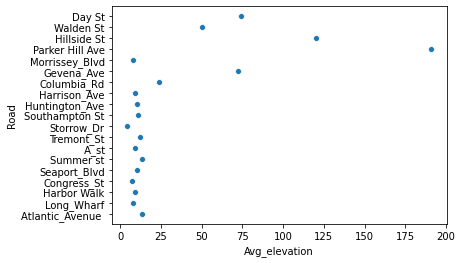

In [716]:
sns.scatterplot(x=Roads.query("City in ('Boston')")['Avg_elevation'],
                y=Roads.query("City in ('Boston')")['Road'])

<AxesSubplot:xlabel='Avg_elevation'>

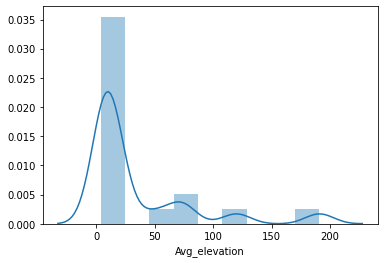

In [719]:
# Average elevation Histogram

sns.distplot(Roads.query("City in ('Boston')")['Avg_elevation'].dropna())

<AxesSubplot:xlabel='Risk_number_occurances_low_elevation_threshold_nasa', ylabel='Road'>

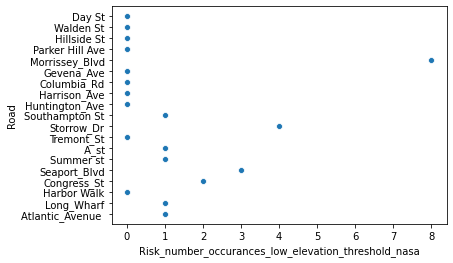

In [724]:
# Risk score from manually curated data by Road

sns.scatterplot(x=Roads.query("City in ('Boston')")['Risk_number_occurances_low_elevation_threshold_nasa'],
                y=Roads.query("City in ('Boston')")['Road'])

<AxesSubplot:xlabel='Risk_number_occurances_low_elevation_threshold_nasa'>

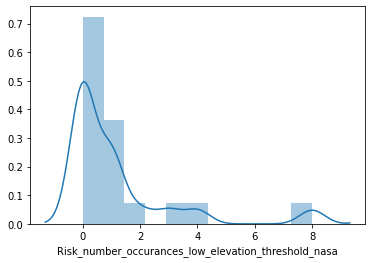

In [819]:
# Risk score from manually curated data Histogram

sns.distplot(Roads.query("City in ('Boston')")['Risk_number_occurances_low_elevation_threshold_nasa'])

<AxesSubplot:xlabel='Avg_elevation', ylabel='Risk_number_occurances_low_elevation_threshold_nasa'>

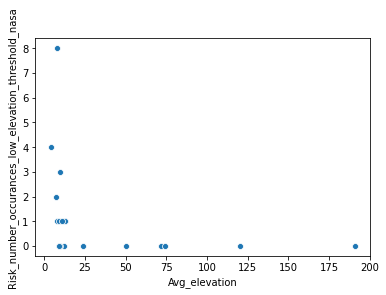

In [822]:
sns.scatterplot(x=Roads.query("City in ('Boston')")['Avg_elevation'],
                y=Roads.query("City in ('Boston')")['Risk_number_occurances_low_elevation_threshold_nasa'])

<AxesSubplot:xlabel='Distance_from_shoreline', ylabel='Road'>

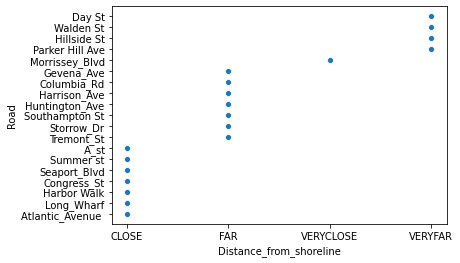

In [824]:
sns.scatterplot(x=Roads.query("City in ('Boston')")['Distance_from_shoreline'],
                y=Roads.query("City in ('Boston')")['Road'])

<AxesSubplot:xlabel='Avg_elevation', ylabel='Q_flow_in_square_feet_multiplied_by_feet_per_hour'>

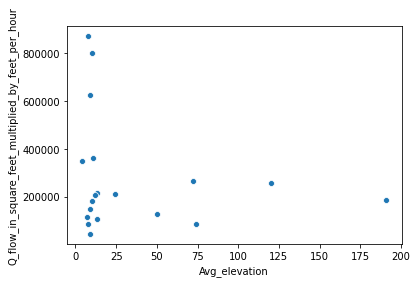

In [820]:
sns.scatterplot(x=Roads.query("City in ('Boston')")['Avg_elevation'],
                y=Roads.query("City in ('Boston')")['Q_flow_in_square_feet_multiplied_by_feet_per_hour'])

<AxesSubplot:xlabel='Avg_elevation', ylabel='Erosion_Sediment_Pounds_Per_Year_from_cubic_feet'>

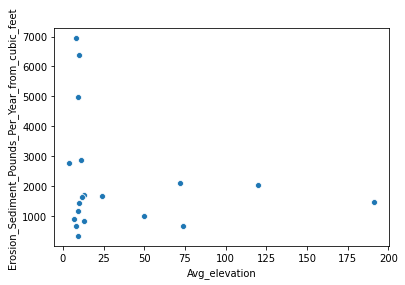

In [825]:
sns.scatterplot(x=Roads.query("City in ('Boston')")['Avg_elevation'],
                y=Roads.query("City in ('Boston')")['Erosion_Sediment_Pounds_Per_Year_from_cubic_feet'])

<AxesSubplot:xlabel='Avg_elevation', ylabel='RUSLE_output_pound_per_sqft_per_year'>

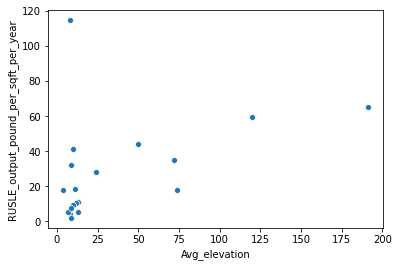

In [827]:
sns.scatterplot(x=Roads.query("City in ('Boston')")['Avg_elevation'],
                y=Roads.query("City in ('Boston')")['RUSLE_output_pound_per_sqft_per_year'])

In [ ]:
sns.scatterplot(y=Roads['Road'],
                x=Roads[0:13]['Q'])

In [828]:
# Different binning of only 1-14 Exclude Gevena Road and others

In [829]:
Roads[0:13]

,Road,State,City,Region,Distance_from_shoreline,Min_elevation_ft_google,Avg_elevation,Max_elevation_ft_google,Max_slope_pct_1_google,Max_slope_pct_2_google,...,Cost_per_mile_byCity,RUSLE_output_pound_per_sqft_per_year,Width_ft,RUSLE_output_tons_hectare_year,Length_ft,RUSLE_LS_value,Avg_abs_of_both_slopes,RUSLE_R_value,RUSLE_K_value,R_value_from_address
0,Atlantic_Avenue,MA,Boston,Seaport,CLOSE,12.0,13.0,14.0,6.9,-8.0,...,"$345,947",5.190037,35.3,113.039001,899.0,0.26,1.300,137,0.0001,406 Atlantic Ave
1,Long_Wharf,MA,Boston,Seaport,CLOSE,5.0,8.0,9.0,4.5,-4.1,...,"$345,947",4.130154,34.5,89.954748,732.0,0.26,0.800,137,0.0001,1 Long Wharf
2,Harbor Walk,MA,Boston,Seaport,CLOSE,8.0,9.0,11.0,23.9,-20.4,...,"$345,947",1.951303,21.4,42.499373,604.0,0.24,0.895,137,0.0001,1 Harbor Walk
3,Congress_St,MA,Boston,Seaport,CLOSE,6.0,7.0,11.0,1.9,-21.6,...,"$345,947",5.285619,48.9,115.120771,716.0,0.24,0.850,137,0.0001,1 Congress Street
4,Seaport_Blvd,MA,Boston,Seaport,CLOSE,7.0,10.0,19.0,32.9,-9.7,...,"$345,947",41.141847,74.0,896.069434,3273.6,0.27,1.300,137,0.0001,1 Seaport Blvd
5,Summer st,MA,Boston,Seaport,CLOSE,11.0,13.0,16.0,5.0,-5.7,...,"$345,947",11.028574,69.9,240.202333,929.0,0.27,1.100,137,0.0001,1 Summer St
6,A_st,MA,Boston,Seaport,CLOSE,7.0,9.0,16.0,34.4,-34.6,...,"$345,947",32.228378,59.9,701.934077,3168.0,0.27,1.400,137,0.0001,1 A St
7,Tremont_St,MA,Boston,Downtown,FAR,8.0,12.0,18.0,1.7,-6.4,...,"$345,947",10.569646,63.7,230.206895,977.0,0.27,1.000,137,0.0001,1 Tremont St
8,Storrow_Dr,MA,Boston,Downtown,FAR,2.0,4.0,10.0,6.3,-5.8,...,"$345,947",17.863317,47.4,389.063039,2219.0,0.27,1.350,137,0.0001,1 Storrow Drive
9,Southampton St,MA,Boston,Downtown,FAR,8.0,11.0,12.0,5.4,-4.2,...,"$345,947",18.589156,52.8,404.871826,2073.0,0.27,0.750,137,0.0001,1 Southampton St


<AxesSubplot:xlabel='Avg_elevation', ylabel='Road'>

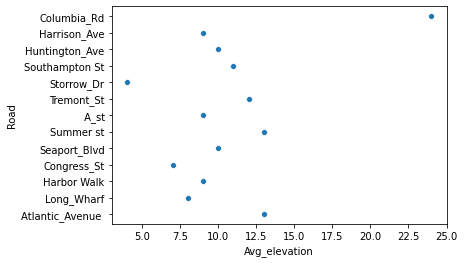

In [830]:
# Average Elevation by Road

sns.scatterplot(x=Roads[0:13]['Avg_elevation'],
                y=Roads[0:13]['Road'])

<AxesSubplot:xlabel='Avg_elevation'>

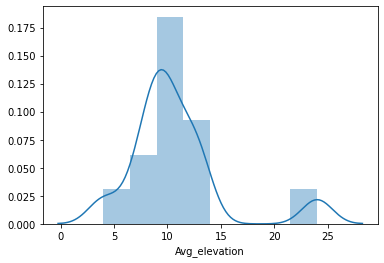

In [831]:
# Average elevation Histogram

sns.distplot(Roads[0:13]['Avg_elevation'].dropna())

<AxesSubplot:xlabel='Risk_number_occurances_low_elevation_threshold_nasa', ylabel='Road'>

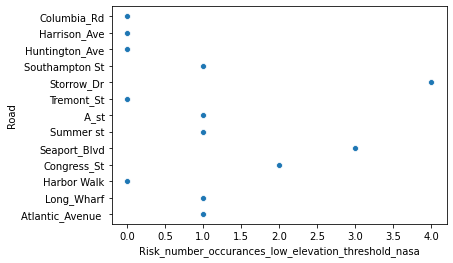

In [832]:
# Risk score from manually curated data by Road

sns.scatterplot(x=Roads[0:13]['Risk_number_occurances_low_elevation_threshold_nasa'],
                y=Roads[0:13]['Road'])

<AxesSubplot:xlabel='Risk_number_occurances_low_elevation_threshold_nasa'>

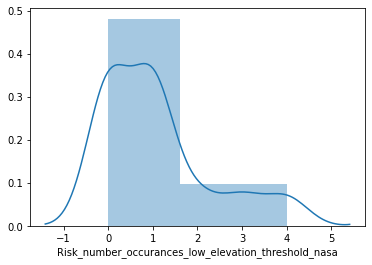

In [833]:
# Risk score from manually curated data Histogram

sns.distplot(Roads[0:13]['Risk_number_occurances_low_elevation_threshold_nasa'].dropna())

In [138]:
#sns.pairplot(Roads,hue=Roads['Road'])

<AxesSubplot:xlabel='Avg_elevation', ylabel='Risk_number_occurances_low_elevation_threshold_nasa'>

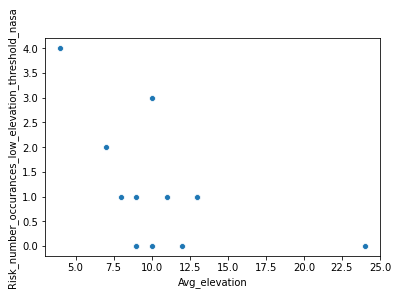

In [835]:
sns.scatterplot(x=Roads[0:13]['Avg_elevation'],
                y=Roads[0:13]['Risk_number_occurances_low_elevation_threshold_nasa'])

<AxesSubplot:xlabel='Distance_from_shoreline', ylabel='Road'>

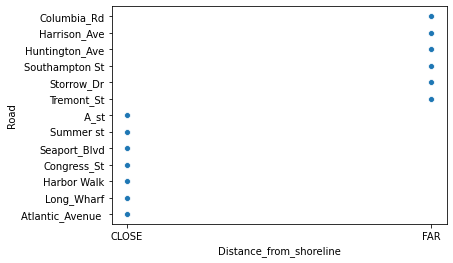

In [836]:
sns.scatterplot(x=Roads[0:13]['Distance_from_shoreline'],
                y=Roads[0:13]['Road'])

<AxesSubplot:xlabel='Avg_elevation', ylabel='Q_flow_in_square_feet_multiplied_by_feet_per_hour'>

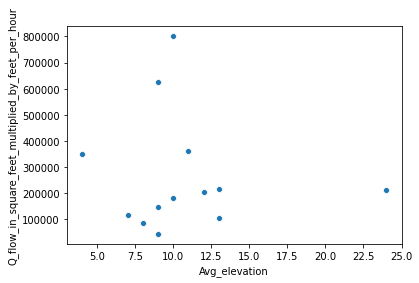

In [953]:
sns.scatterplot(x=Roads[0:13]['Avg_elevation'],
                y=Roads[0:13]['Q_flow_in_square_feet_multiplied_by_feet_per_hour'])

<AxesSubplot:xlabel='Avg_elevation', ylabel='Erosion_Sediment_Pounds_Per_Year_from_cubic_feet'>

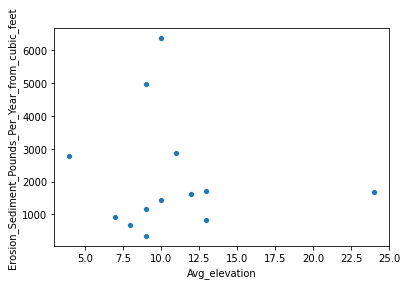

In [954]:
sns.scatterplot(x=Roads[0:13]['Avg_elevation'],
                y=Roads[0:13]['Erosion_Sediment_Pounds_Per_Year_from_cubic_feet'])

<AxesSubplot:xlabel='Avg_elevation', ylabel='RUSLE_output_pound_per_sqft_per_year'>

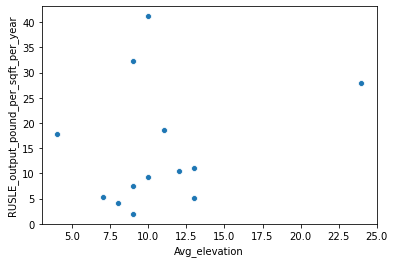

In [955]:
sns.scatterplot(x=Roads[0:13]['Avg_elevation'],
                y=Roads[0:13]['RUSLE_output_pound_per_sqft_per_year'])

<AxesSubplot:xlabel='Q_flow_in_square_feet_multiplied_by_feet_per_hour', ylabel='Road'>

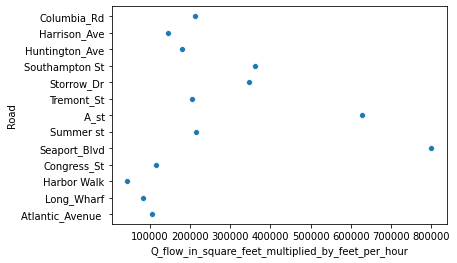

In [979]:
sns.scatterplot(y=Roads['Road'],
                x=Roads[0:13]['Q_flow_in_square_feet_multiplied_by_feet_per_hour'])

<AxesSubplot:xlabel='Erosion_Sediment_Pounds_Per_Year_from_cubic_feet', ylabel='Road'>

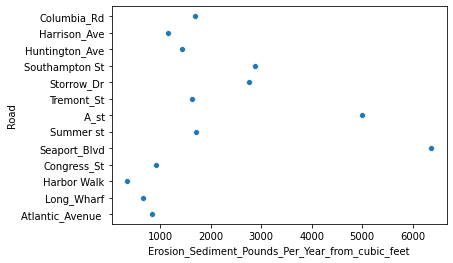

In [978]:
sns.scatterplot(y=Roads['Road'],
                x=Roads[0:13]['Erosion_Sediment_Pounds_Per_Year_from_cubic_feet'])

<AxesSubplot:xlabel='RUSLE_output_pound_per_sqft_per_year', ylabel='Road'>

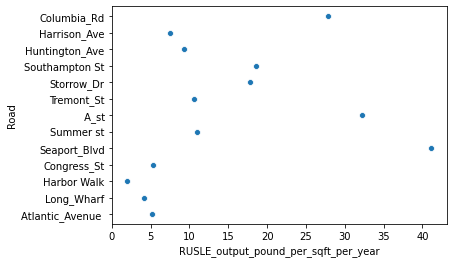

In [977]:
sns.scatterplot(y=Roads['Road'],
                x=Roads[0:13]['RUSLE_output_pound_per_sqft_per_year'])

In [842]:
# Make new data frame

In [843]:
df = Roads[['Avg_elevation',
            'Road',
            'Q_flow_in_square_feet_multiplied_by_feet_per_hour',
            'Avg_abs_of_both_slopes',
            'Min_elevation_ft_google',
            'Risk_number_occurances_low_elevation_threshold_nasa',
            'RUSLE_output_pound_per_sqft_per_year',
            'Distance_from_shoreline_google_ft',
            'Pounds_per_hour_in_storm',
            'Cost_per_section']]

In [844]:
df = df[0:13]

In [958]:
df = Roads[['Avg_elevation',
            'Road',
            'Q_flow_in_square_feet_multiplied_by_feet_per_hour',
            'Risk_number_occurances_low_elevation_threshold_nasa',
            'RUSLE_output_pound_per_sqft_per_year',
            'Distance_from_shoreline_google_ft',
            'Pounds_per_hour_in_storm',
            'Cost_per_section']]

In [961]:
(df[0:13])

,Avg_elevation,Road,Q_flow_in_square_feet_multiplied_by_feet_per_hour,Risk_number_occurances_low_elevation_threshold_nasa,RUSLE_output_pound_per_sqft_per_year,Distance_from_shoreline_google_ft,Pounds_per_hour_in_storm,Cost_per_section
0,13.0,Atlantic_Avenue,104843.5151,1,5.190037,194.0,47.352935,"$58,902.72"
1,8.0,Long_Wharf,83432.9025,1,4.130154,31.8,37.682758,"$47,960.83"
2,9.0,Harbor Walk,42702.9510,0,1.951303,0.0,19.286935,"$39,574.24"
3,7.0,Congress_St,115672.2165,2,5.285619,0.0,52.243755,"$46,912.51"
4,10.0,Seaport_Blvd,800321.5440,3,41.141847,0.0,361.467982,"$214,487.14"
5,13.0,Summer st,214535.9441,1,11.028574,101.0,96.895898,"$60,868.33"
6,9.0,A_st,626930.1720,1,32.228378,685.0,283.155171,"$207,568.20"
7,12.0,Tremont_St,205608.5509,0,10.569646,6336.0,92.863810,"$64,013.30"
8,4.0,Storrow_Dr,347490.4073,4,17.863317,37.6,156.945239,"$145,389.47"
9,11.0,Southampton St,361609.9740,1,18.589156,4110.0,163.322390,"$135,823.51"


In [845]:
%% capture
# Plot pair plot/matrix scatterplot
# A Multivariate technique allowing visibility of All x All parameters in a dataframe.
# In this case we expect some of them to be correlated.
# Color/hue changes based on Road Group/Binning.
# Some Warnings may be printed out with this python routine.
plot = sns.pairplot(df[:13], hue="Road")

UsageError: Cell magic `%%` not found.


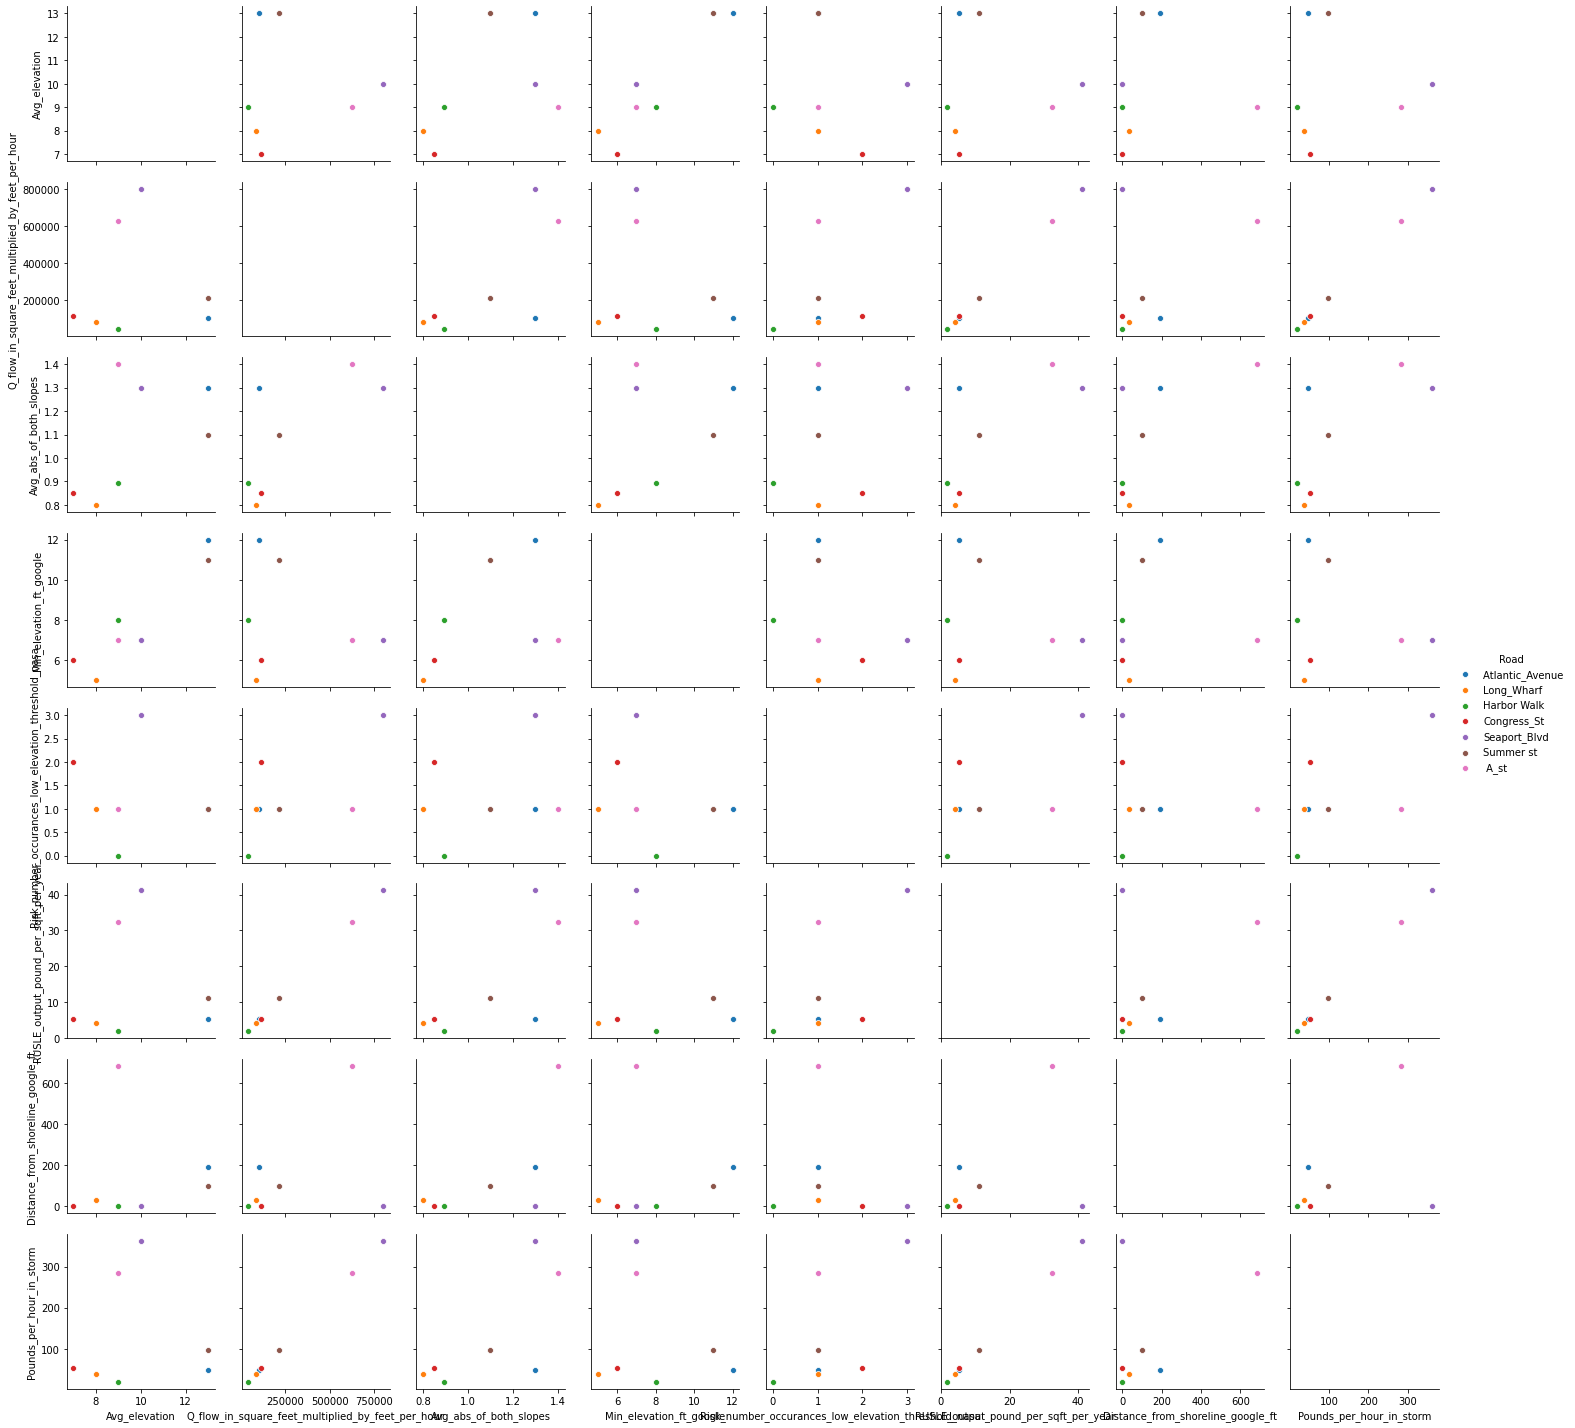

In [846]:
plot.fig

In [190]:
##############
### SEM modeling
############

In [555]:
import semopy

In [556]:
pip install semopy

Note: you may need to restart the kernel to use updated packages.


In [557]:
from semopy import Model

In [558]:
help(semopy)

Help on package semopy:

NAME
    semopy - semopy: Structural Equation Modeling Optimization in Python

PACKAGE CONTENTS
    constraints
    efa
    effects (package)
    examples (package)
    imputer
    inspector
    means
    model
    model_base
    model_effects
    model_generalized_effects
    model_generation (package)
    model_means
    multigroup
    optimizer
    parser
    plot
    polycorr
    regularization
    report (package)
    solver
    startingvalues
    stats
    tests (package)
    unbias
    univariate_blup
    utils

DATA
    name = 'semopy'

VERSION
    2.3.9

AUTHOR
    Georgy Meshcheryakov

FILE
    //anaconda2/lib/python3.7/site-packages/semopy/__init__.py




In [559]:
###############
# example data format for model as a string
###############

In [848]:
desc = semopy.examples.political_democracy.get_model()
(str(desc))

'# measurement model\nind60 =~ x1 + x2 + x3\ndem60 =~ y1 + y2 + y3 + y4\ndem65 =~ y5 + y6 + y7 + y8\n# regressions\ndem60 ~ ind60\ndem65 ~ ind60 + dem60\n# residual correlations\ny1 ~~ y5\ny2 ~~ y4 + y6\ny3 ~~ y7\ny4 ~~ y8\ny6 ~~ y8'

In [849]:
desc=str('# measurement model\nind60 =~ x1 + x2 + x3\ndem60 =~ y1 + y2 + y3 + y4\ndem65 =~ y5 + y6 + y7 + y8\n# regressions\ndem60 ~ ind60\ndem65 ~ ind60 + dem60\n# residual correlations\ny1 ~~ y5\ny2 ~~ y4 + y6\ny3 ~~ y7\ny4 ~~ y8\ny6 ~~ y8\n')

In [850]:
print(desc)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8



In [851]:
data = semopy.examples.political_democracy.get_data()
mod = semopy.examples.political_democracy.get_model()
m = semopy.Model(mod)
m.fit(data)

SolverResult(fun=0.5083392814467853, success=True, n_it=52, x=array([2.18049353, 1.81854627, 1.25681912, 1.0581737 , 1.26518593,
       1.18574261, 1.2797166 , 1.26608392, 1.48237933, 0.57191198,
       0.8375742 , 0.62442304, 1.89274334, 1.31958852, 2.1561642 ,
       7.38529248, 0.79332879, 5.0666284 , 0.34722151, 3.14791141,
       1.35703671, 4.95436369, 0.11989392, 0.46673215, 0.17221   ,
       3.25638856, 3.43003171, 0.08157264, 2.35190966, 3.95084855,
       0.44832111]), message='Optimization terminated successfully.', name_method='SLSQP', name_obj='MLW')

In [852]:
data

,y1,y2,y3,y4,y5,y6,y7,y8,x1,x2,x3
1,2.50,0.000000,3.333333,0.000000,1.250000,0.000000,3.726360,3.333333,4.442651,3.637586,2.557615
2,1.25,0.000000,3.333333,0.000000,6.250000,1.100000,6.666666,0.736999,5.384495,5.062595,3.568079
3,7.50,8.800000,9.999998,9.199991,8.750000,8.094061,9.999998,8.211809,5.961005,6.255750,5.224433
4,8.90,8.800000,9.999998,9.199991,8.907948,8.127979,9.999998,4.615086,6.285998,7.567863,6.267495
5,10.00,3.333333,9.999998,6.666666,7.500000,3.333333,9.999998,6.666666,5.863631,6.818924,4.573679
...,...,...,...,...,...,...,...,...,...,...,...
71,5.40,9.999998,6.666666,3.333333,3.750000,6.666666,6.666666,1.485166,4.477337,3.091042,1.987909
72,7.50,8.800000,9.999998,6.066666,7.500000,6.666666,9.999998,6.666666,5.337538,5.631212,3.491004
73,7.50,7.000000,9.999998,6.852998,7.500000,6.348340,6.666666,7.508044,6.129050,6.403574,5.001796
74,10.00,6.666666,9.999998,10.000000,10.000000,6.666666,9.999998,10.000000,5.003946,4.962845,3.976994


In [853]:
m.fit(data)

SolverResult(fun=0.5083392076537301, success=True, n_it=1, x=array([2.1804896 , 1.81854779, 1.25681816, 1.05817273, 1.26518651,
       1.18574416, 1.27971735, 1.26608314, 1.48238082, 0.57191337,
       0.83757626, 0.62442232, 1.89274187, 1.31958357, 2.15616238,
       7.38529177, 0.79332957, 5.06662828, 0.34722114, 3.1479136 ,
       1.35703585, 4.95436487, 0.11987943, 0.46672976, 0.17220885,
       3.25638669, 3.43003224, 0.08153598, 2.3519089 , 3.95085012,
       0.44832498]), message='Optimization terminated successfully.', name_method='SLSQP', name_obj='MLW')

In [854]:
m.parameters

{'_b1': Model.Parameter(start=1.0, active=False, bound=(None, None), locations=[Model.ParameterLoc(matrix=array([[0.        , 0.        , 1.        ],
        [0.        , 0.        , 2.1804896 ],
        [0.        , 0.        , 1.81854779],
        [1.        , 0.        , 0.        ],
        [1.25681816, 0.        , 0.        ],
        [1.05817273, 0.        , 0.        ],
        [1.26518651, 0.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [0.        , 1.18574416, 0.        ],
        [0.        , 1.27971735, 0.        ],
        [0.        , 1.26608314, 0.        ]]), indices=(0, 2), symmetric=False)]),
 '_b2': Model.Parameter(start=1.8437371747614952, active=True, bound=(None, None), locations=[Model.ParameterLoc(matrix=array([[0.        , 0.        , 1.        ],
        [0.        , 0.        , 2.1804896 ],
        [0.        , 0.        , 1.81854779],
        [1.        , 0.        , 0.        ],
        [1.25681816, 0.        , 0.        ],
  

In [857]:
m.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,dem60,~,ind60,1.482381,0.399018,3.71508,0.000203142
1,dem65,~,ind60,0.571913,0.22138,2.5834,0.00978329
2,dem65,~,dem60,0.837576,0.0984455,8.50802,0
3,x1,~,ind60,1.000000,-,-,-
4,x2,~,ind60,2.180490,0.138538,15.7392,0
5,x3,~,ind60,1.818548,0.151979,11.9658,0
6,y1,~,dem60,1.000000,-,-,-
7,y2,~,dem60,1.256818,0.182686,6.87966,5.99965e-12
8,y3,~,dem60,1.058173,0.15152,6.98371,2.87481e-12
9,y4,~,dem60,1.265187,0.145151,8.71636,0


In [ ]:
########################
##### END EXAMPLE ######
########################

In [956]:
########################
##### SEM         ######
########################

In [ ]:
# Notes
# Our measurements
# 

# RainIntensity =~ 

# Model Risk as a latent variable

# Risk =~ Risk_number_occurances_low_elevation_threshold_nasa + Distance_from_shoreline_google_ft
# Risk Avg_abs_of_both_slopes	

# Risk =~ Risk_number_occurances_low_elevation_threshold_nasa

# Topo =~ Min_elevation_ft_google + Avg_elevation + 
# Min_elevation_ft_google~~Avg_elevation

# Rain=~

# Regression for Risk as a function of parameters
# Risk ~ Q_flow_in_square_feet_multiplied_by_feet_per_hour + Avg_elevation + RUSLE_output_pound_per_sqft_per_year


#Regression for Risk as a function of latent variables connected to parameters
# Risk ~ Rain + Topo + Erosion

# Risk,Cost ~ Rain (aggregate) + Topo (Elevation + Slope + Area) + Erosion (flow equation + RUSLE)
# Risk == Cost
# Risk as measured by Risk_number_occurances_low_elevation_threshold_nasa + Distance_from_shoreline_google_ft


In [202]:
Roads.columns

Index(['Road', 'State', 'City', 'Region', 'Distance_from_shoreline',
       'Min_elevation_ft_google', 'Avg_elevation', 'Max_elevation_ft_google',
       'Max_slope_pct_1_google', 'Max_slope_pct_2_google',
       'Avg_slope_pct_1_google', 'Avg_slope_pct_2_google',
       'Distance_of_path_ft_google', 'Distance_of_path_mi_google',
       'Calculated_slope_rise_run_mi', 'Width_feet_google',
       'Distance_from_shoreline_google_ft', 'Distance_from_shoreline_mile',
       'Area_calculated_square_feet', 'NASA_GeoTiff_download',
       'Risk_number_occurances_low_elevation_threshold_nasa',
       'Road_type_description_manual', 'Comments_risk', 'Annual_sum_inches',
       'Inches_per_hour_lookup', 'Hours_of_storm_per_year',
       'Days_of_more_than_one_inch_storm_per_year', 'Runoff_coefficient',
       'Q_flow_in_square_feet_multiplied_by_feet_per_hour',
       'Feet_cubed_Per_year',
       'Erosion_Sediment_Pounds_Per_Year_from_cubic_feet',
       'Pounds_per_hour_in_storm', 'Salt_per_mi

In [858]:
# Simple model

In [859]:
# Measurement variables: Risk_occuranges & Distance from shore
# Risk as a function of flow + average elevation

In [860]:
desc=str('Risk =~ Risk_number_occurances_low_elevation_threshold_nasa + Distance_from_shoreline_google_ft\n Risk ~ Q_flow_in_square_feet_multiplied_by_feet_per_hour + Avg_elevation')

In [861]:
Roads.query("City in ('Boston')")

,Road,State,City,Region,Distance_from_shoreline,Min_elevation_ft_google,Avg_elevation,Max_elevation_ft_google,Max_slope_pct_1_google,Max_slope_pct_2_google,...,Cost_per_mile_byCity,RUSLE_output_pound_per_sqft_per_year,Width_ft,RUSLE_output_tons_hectare_year,Length_ft,RUSLE_LS_value,Avg_abs_of_both_slopes,RUSLE_R_value,RUSLE_K_value,R_value_from_address
0,Atlantic_Avenue,MA,Boston,Seaport,CLOSE,12.0,13.0,14.0,6.9,-8.0,...,"$345,947",5.190037,35.3,113.039001,899.0,0.26,1.300,137,0.0001,406 Atlantic Ave
1,Long_Wharf,MA,Boston,Seaport,CLOSE,5.0,8.0,9.0,4.5,-4.1,...,"$345,947",4.130154,34.5,89.954748,732.0,0.26,0.800,137,0.0001,1 Long Wharf
2,Harbor Walk,MA,Boston,Seaport,CLOSE,8.0,9.0,11.0,23.9,-20.4,...,"$345,947",1.951303,21.4,42.499373,604.0,0.24,0.895,137,0.0001,1 Harbor Walk
3,Congress_St,MA,Boston,Seaport,CLOSE,6.0,7.0,11.0,1.9,-21.6,...,"$345,947",5.285619,48.9,115.120771,716.0,0.24,0.850,137,0.0001,1 Congress Street
4,Seaport_Blvd,MA,Boston,Seaport,CLOSE,7.0,10.0,19.0,32.9,-9.7,...,"$345,947",41.141847,74.0,896.069434,3273.6,0.27,1.300,137,0.0001,1 Seaport Blvd
5,Summer st,MA,Boston,Seaport,CLOSE,11.0,13.0,16.0,5.0,-5.7,...,"$345,947",11.028574,69.9,240.202333,929.0,0.27,1.100,137,0.0001,1 Summer St
6,A_st,MA,Boston,Seaport,CLOSE,7.0,9.0,16.0,34.4,-34.6,...,"$345,947",32.228378,59.9,701.934077,3168.0,0.27,1.400,137,0.0001,1 A St
7,Tremont_St,MA,Boston,Downtown,FAR,8.0,12.0,18.0,1.7,-6.4,...,"$345,947",10.569646,63.7,230.206895,977.0,0.27,1.000,137,0.0001,1 Tremont St
8,Storrow_Dr,MA,Boston,Downtown,FAR,2.0,4.0,10.0,6.3,-5.8,...,"$345,947",17.863317,47.4,389.063039,2219.0,0.27,1.350,137,0.0001,1 Storrow Drive
9,Southampton St,MA,Boston,Downtown,FAR,8.0,11.0,12.0,5.4,-4.2,...,"$345,947",18.589156,52.8,404.871826,2073.0,0.27,0.750,137,0.0001,1 Southampton St


In [862]:
model = Model(desc)
opt_res = model.fit(Roads.query("City in ('Boston')"))
estimates = model.inspect()

In [863]:
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Risk,~,Q_flow_in_square_feet_multiplied_by_feet_per_hour,5.903753e-06,1.27915e-06,4.61539,3.92367e-06
1,Risk,~,Avg_elevation,-7.932541e-03,0.00620243,-1.27894,0.200918
2,Risk_number_occurances_low_elevation_threshold...,~,Risk,1.000000e+00,-,-,-
3,Distance_from_shoreline_google_ft,~,Risk,-5.945163e+02,434.613,-1.36792,0.171337
4,Risk,~~,Risk,1.607442e+00,1.88441,0.853022,0.393647
5,Risk_number_occurances_low_elevation_threshold...,~~,Risk_number_occurances_low_elevation_threshold...,0.000000e+00,1.8108,0,1
6,Distance_from_shoreline_google_ft,~~,Distance_from_shoreline_google_ft,7.930071e+06,2.65127e+06,2.99105,0.00278021


In [864]:
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Risk,~,Q_flow_in_square_feet_multiplied_by_feet_per_hour,5.903753e-06,1.27915e-06,4.61539,3.92367e-06
1,Risk,~,Avg_elevation,-7.932541e-03,0.00620243,-1.27894,0.200918
2,Risk_number_occurances_low_elevation_threshold...,~,Risk,1.000000e+00,-,-,-
3,Distance_from_shoreline_google_ft,~,Risk,-5.945163e+02,434.613,-1.36792,0.171337
4,Risk,~~,Risk,1.607442e+00,1.88441,0.853022,0.393647
5,Risk_number_occurances_low_elevation_threshold...,~~,Risk_number_occurances_low_elevation_threshold...,0.000000e+00,1.8108,0,1
6,Distance_from_shoreline_google_ft,~~,Distance_from_shoreline_google_ft,7.930071e+06,2.65127e+06,2.99105,0.00278021


In [865]:
###########

In [866]:
# Different binning of only 1-14.

In [867]:
Roads[0:13]

,Road,State,City,Region,Distance_from_shoreline,Min_elevation_ft_google,Avg_elevation,Max_elevation_ft_google,Max_slope_pct_1_google,Max_slope_pct_2_google,...,Cost_per_mile_byCity,RUSLE_output_pound_per_sqft_per_year,Width_ft,RUSLE_output_tons_hectare_year,Length_ft,RUSLE_LS_value,Avg_abs_of_both_slopes,RUSLE_R_value,RUSLE_K_value,R_value_from_address
0,Atlantic_Avenue,MA,Boston,Seaport,CLOSE,12.0,13.0,14.0,6.9,-8.0,...,"$345,947",5.190037,35.3,113.039001,899.0,0.26,1.300,137,0.0001,406 Atlantic Ave
1,Long_Wharf,MA,Boston,Seaport,CLOSE,5.0,8.0,9.0,4.5,-4.1,...,"$345,947",4.130154,34.5,89.954748,732.0,0.26,0.800,137,0.0001,1 Long Wharf
2,Harbor Walk,MA,Boston,Seaport,CLOSE,8.0,9.0,11.0,23.9,-20.4,...,"$345,947",1.951303,21.4,42.499373,604.0,0.24,0.895,137,0.0001,1 Harbor Walk
3,Congress_St,MA,Boston,Seaport,CLOSE,6.0,7.0,11.0,1.9,-21.6,...,"$345,947",5.285619,48.9,115.120771,716.0,0.24,0.850,137,0.0001,1 Congress Street
4,Seaport_Blvd,MA,Boston,Seaport,CLOSE,7.0,10.0,19.0,32.9,-9.7,...,"$345,947",41.141847,74.0,896.069434,3273.6,0.27,1.300,137,0.0001,1 Seaport Blvd
5,Summer st,MA,Boston,Seaport,CLOSE,11.0,13.0,16.0,5.0,-5.7,...,"$345,947",11.028574,69.9,240.202333,929.0,0.27,1.100,137,0.0001,1 Summer St
6,A_st,MA,Boston,Seaport,CLOSE,7.0,9.0,16.0,34.4,-34.6,...,"$345,947",32.228378,59.9,701.934077,3168.0,0.27,1.400,137,0.0001,1 A St
7,Tremont_St,MA,Boston,Downtown,FAR,8.0,12.0,18.0,1.7,-6.4,...,"$345,947",10.569646,63.7,230.206895,977.0,0.27,1.000,137,0.0001,1 Tremont St
8,Storrow_Dr,MA,Boston,Downtown,FAR,2.0,4.0,10.0,6.3,-5.8,...,"$345,947",17.863317,47.4,389.063039,2219.0,0.27,1.350,137,0.0001,1 Storrow Drive
9,Southampton St,MA,Boston,Downtown,FAR,8.0,11.0,12.0,5.4,-4.2,...,"$345,947",18.589156,52.8,404.871826,2073.0,0.27,0.750,137,0.0001,1 Southampton St


In [890]:
# Very simple model with just regression parameters 

In [891]:
desc=str('Risk_number_occurances_low_elevation_threshold_nasa ~ Q_flow_in_square_feet_multiplied_by_feet_per_hour + Avg_elevation')

In [892]:
model = Model(desc)
opt_res = model.fit(Roads[0:13])
estimates = model.inspect()

In [893]:
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Risk_number_occurances_low_elevation_threshold...,~,Q_flow_in_square_feet_multiplied_by_feet_per_hour,0.000003,0.000001,2.313754,0.020681
1,Risk_number_occurances_low_elevation_threshold...,~,Avg_elevation,-0.123914,0.054099,-2.290522,0.021991
2,Risk_number_occurances_low_elevation_threshold...,~~,Risk_number_occurances_low_elevation_threshold...,0.769005,0.301629,2.549510,0.010787


In [912]:
# Simple model with two measurements for latent variable and flow and elevation as factors for risk

In [913]:
desc=str('Risk =~ Risk_number_occurances_low_elevation_threshold_nasa + Distance_from_shoreline_google_ft \n Risk ~  Q_flow_in_square_feet_multiplied_by_feet_per_hour + Avg_elevation ')

In [914]:
model = Model(desc)
opt_res = model.fit(Roads[0:13])
estimates = model.inspect()

In [915]:
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Risk,~,Q_flow_in_square_feet_multiplied_by_feet_per_hour,2.642344e-06,1.1417e-06,2.3144,0.0206458
1,Risk,~,Avg_elevation,-1.238143e-01,0.0540815,-2.2894,0.022056
2,Risk_number_occurances_low_elevation_threshold...,~,Risk,1.000000e+00,-,-,-
3,Distance_from_shoreline_google_ft,~,Risk,-1.442395e+03,992.522,-1.45326,0.146151
4,Risk,~~,Risk,7.685155e-01,0.787567,0.97581,0.329159
5,Risk_number_occurances_low_elevation_threshold...,~~,Risk_number_occurances_low_elevation_threshold...,2.027805e-17,0.727597,2.78699e-17,1
6,Distance_from_shoreline_google_ft,~~,Distance_from_shoreline_google_ft,8.789363e+06,3.76518e+06,2.33438,0.0195757


In [ ]:
# RESULTS w/ tighter data binned : Significant impact of Flow + Elevation on Risk

In [916]:
# Change simple model to have Erosion from flow 

In [962]:
desc=str('Risk =~ Risk_number_occurances_low_elevation_threshold_nasa + Distance_from_shoreline_google_ft \n Risk ~ Erosion_Sediment_Pounds_Per_Year_from_cubic_feet + Avg_elevation')

In [963]:
model = Model(desc)
opt_res = model.fit(Roads[0:13])
estimates = model.inspect()

In [964]:
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Risk,~,Erosion_Sediment_Pounds_Per_Year_from_cubic_feet,3.322143e-04,0.000143476,2.31548,0.0205869
1,Risk,~,Avg_elevation,-1.239069e-01,0.0540863,-2.29091,0.0219686
2,Risk_number_occurances_low_elevation_threshold...,~,Risk,1.000000e+00,-,-,-
3,Distance_from_shoreline_google_ft,~,Risk,-1.442329e+03,991.878,-1.45414,0.145907
4,Risk,~~,Risk,7.686517e-01,0.787478,0.976093,0.329019
5,Risk_number_occurances_low_elevation_threshold...,~~,Risk_number_occurances_low_elevation_threshold...,3.837950e-17,0.727479,5.27568e-17,1
6,Distance_from_shoreline_google_ft,~~,Distance_from_shoreline_google_ft,8.789363e+06,3.76502e+06,2.33448,0.0195707


In [920]:
# Similar results

In [921]:
# Rework simple model to just include elevation and erosion via RUSLE

In [922]:
desc=str('Risk =~ Risk_number_occurances_low_elevation_threshold_nasa + Distance_from_shoreline_google_ft\n Risk ~ Avg_elevation + RUSLE_output_pound_per_sqft_per_year')

In [923]:
model = Model(desc)
opt_res = model.fit(Roads[0:13])
estimates = model.inspect()

In [924]:
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Risk,~,Avg_elevation,-1.711697e-01,0.0527442,-3.24528,0.00117335
1,Risk,~,RUSLE_output_pound_per_sqft_per_year,5.571864e-02,0.0203972,2.73169,0.00630111
2,Risk_number_occurances_low_elevation_threshold...,~,Risk,1.000000e+00,-,-,-
3,Distance_from_shoreline_google_ft,~,Risk,-1.442329e+03,939.349,-1.53546,0.124672
4,Risk,~~,Risk,6.897470e-01,0.706508,0.976276,0.328927
5,Risk_number_occurances_low_elevation_threshold...,~~,Risk_number_occurances_low_elevation_threshold...,0.000000e+00,0.652657,0,1
6,Distance_from_shoreline_google_ft,~~,Distance_from_shoreline_google_ft,8.789363e+06,3.7052e+06,2.37217,0.0176839


In [925]:
# RESULTS: Significant and greater Estimated impact of Erosion on risk determined by RUSLE

In [ ]:
####

In [926]:
### Simple model w/ Flow + RUSLE

In [927]:
desc=str('Risk =~ Risk_number_occurances_low_elevation_threshold_nasa + Distance_from_shoreline_google_ft \n Risk ~ Q_flow_in_square_feet_multiplied_by_feet_per_hour + Avg_elevation + RUSLE_output_pound_per_sqft_per_year')

In [928]:
model = Model(desc)
opt_res = model.fit(Roads[0:13])
estimates = model.inspect()

In [929]:
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Risk,~,Q_flow_in_square_feet_multiplied_by_feet_per_hour,-5.651467e-06,4.94424e-06,-1.14304,0.253021
1,Risk,~,Avg_elevation,-2.624531e-01,0.0943803,-2.7808,0.00542245
2,Risk,~,RUSLE_output_pound_per_sqft_per_year,1.599542e-01,0.0932394,1.71552,0.0862498
3,Risk_number_occurances_low_elevation_threshold...,~,Risk,1.000000e+00,-,-,-
4,Distance_from_shoreline_google_ft,~,Risk,-1.442363e+03,902.99,-1.59732,0.110195
5,Risk,~~,Risk,6.268110e-01,0.646637,0.96934,0.332375
6,Risk_number_occurances_low_elevation_threshold...,~~,Risk_number_occurances_low_elevation_threshold...,0.000000e+00,0.598075,0,1
7,Distance_from_shoreline_google_ft,~~,Distance_from_shoreline_google_ft,8.789363e+06,3.66513e+06,2.3981,0.0164803


In [931]:
# Fancy model including cost

In [932]:
# Risk,Cost_per_section =~ Risk_number_occurances_low_elevation_threshold_nasa + Distance_from_shoreline_google_ft
# Risk ~ Q_flow_in_square_feet_multiplied_by_feet_per_hour + Avg_elevation + RUSLE_output_pound_per_sqft_per_year + Erosion_Sediment_Pounds_Per_Year_from_cubic_feet

In [933]:
desc=str('Risk, Cost_per_section =~ Risk_number_occurances_low_elevation_threshold_nasa + Distance_from_shoreline_google_ft \n Risk ~ Q_flow_in_square_feet_multiplied_by_feet_per_hour + Avg_elevation + RUSLE_output_pound_per_sqft_per_year + Erosion_Sediment_Pounds_Per_Year_from_cubic_feet')

In [934]:
model = Model(desc)
opt_res = model.fit(Roads[0:13])
estimates = model.inspect()

In [935]:
opt_res

SolverResult(fun=0.2885945963701442, success=True, n_it=24, x=array([-1.44235323e+03, -1.44233177e+03, -2.83382783e-06, -2.62456157e-01,
        1.59947483e-01, -3.55888021e-04,  0.00000000e+00,  3.13601745e-01,
        8.78936342e+06,  3.13477010e-01]), message='Optimization terminated successfully.', name_method='SLSQP', name_obj='MLW')

In [936]:
model.vars

{'all': {'Avg_elevation',
  'Cost_per_section',
  'Distance_from_shoreline_google_ft',
  'Erosion_Sediment_Pounds_Per_Year_from_cubic_feet',
  'Q_flow_in_square_feet_multiplied_by_feet_per_hour',
  'RUSLE_output_pound_per_sqft_per_year',
  'Risk',
  'Risk_number_occurances_low_elevation_threshold_nasa'},
 'endogenous': {'Distance_from_shoreline_google_ft',
  'Risk',
  'Risk_number_occurances_low_elevation_threshold_nasa'},
 'exogenous': {'Avg_elevation',
  'Cost_per_section',
  'Erosion_Sediment_Pounds_Per_Year_from_cubic_feet',
  'Q_flow_in_square_feet_multiplied_by_feet_per_hour',
  'RUSLE_output_pound_per_sqft_per_year'},
 'observed': ['Distance_from_shoreline_google_ft',
  'Risk_number_occurances_low_elevation_threshold_nasa',
  'Avg_elevation',
  'Erosion_Sediment_Pounds_Per_Year_from_cubic_feet',
  'Q_flow_in_square_feet_multiplied_by_feet_per_hour',
  'RUSLE_output_pound_per_sqft_per_year'],
 'latent': {'Cost_per_section', 'Risk'},
 'indicator': {'Distance_from_shoreline_google_

In [937]:
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Risk,~,Q_flow_in_square_feet_multiplied_by_feet_per_hour,-2.833828e-06,7.69307e-06,-0.368361,0.712604
1,Risk,~,Avg_elevation,-2.624562e-01,0.0944004,-2.78024,0.00543182
2,Risk,~,RUSLE_output_pound_per_sqft_per_year,1.599475e-01,0.0932594,1.71508,0.0863301
3,Risk,~,Erosion_Sediment_Pounds_Per_Year_from_cubic_feet,-3.558880e-04,0.000966693,-0.36815,0.712761
4,Risk_number_occurances_low_elevation_threshold...,~,Risk,1.000000e+00,-,-,-
5,Risk_number_occurances_low_elevation_threshold...,~,Cost_per_section,1.000000e+00,-,-,-
6,Distance_from_shoreline_google_ft,~,Risk,-1.442353e+03,0.000134563,-1.07188e+07,0
7,Distance_from_shoreline_google_ft,~,Cost_per_section,-1.442332e+03,0.000128971,-1.11834e+07,0
8,Risk,~~,Risk,3.136017e-01,0.250112,1.25385,0.209898
9,Cost_per_section,~~,Cost_per_section,3.134770e-01,0.250103,1.25339,0.210063


In [938]:
# fancy model for bigger binning 

In [939]:
desc=str('Risk, Cost_per_section =~ Risk_number_occurances_low_elevation_threshold_nasa + Distance_from_shoreline_google_ft \n Risk ~ Q_flow_in_square_feet_multiplied_by_feet_per_hour + Avg_elevation + RUSLE_output_pound_per_sqft_per_year + Erosion_Sediment_Pounds_Per_Year_from_cubic_feet')

In [940]:
model = Model(desc)
opt_res = model.fit(Roads.query("City in ('Boston')"))
estimates = model.inspect()

In [941]:
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Risk,~,Q_flow_in_square_feet_multiplied_by_feet_per_hour,5.719558e-07,7.25277e-06,0.0788603,0.937144
1,Risk,~,Avg_elevation,-2.526125e-02,0.00741127,-3.40849,0.000653231
2,Risk,~,RUSLE_output_pound_per_sqft_per_year,5.301816e-02,0.0166948,3.17573,0.00149459
3,Risk,~,Erosion_Sediment_Pounds_Per_Year_from_cubic_feet,7.080401e-05,0.000911366,0.07769,0.938075
4,Risk_number_occurances_low_elevation_threshold...,~,Risk,1.000000e+00,-,-,-
5,Risk_number_occurances_low_elevation_threshold...,~,Cost_per_section,1.000000e+00,-,-,-
6,Distance_from_shoreline_google_ft,~,Risk,-5.945022e+02,0.00143194,-415171,0
7,Distance_from_shoreline_google_ft,~,Cost_per_section,-5.945131e+02,0.00148153,-401282,0
8,Risk,~~,Risk,5.249102e-01,0.576061,0.911206,0.362187
9,Cost_per_section,~~,Cost_per_section,5.249582e-01,0.57609,0.911243,0.362167


In [989]:
# fancy model for bigger binning without Erosion from flow calculations

In [990]:
desc=str('Risk, Cost_per_section =~ Risk_number_occurances_low_elevation_threshold_nasa + Distance_from_shoreline_google_ft \n Risk ~ Q_flow_in_square_feet_multiplied_by_feet_per_hour + Avg_elevation + RUSLE_output_pound_per_sqft_per_year')

In [991]:
model = Model(desc)
opt_res = model.fit(Roads.query("City in ('Boston')"))
estimates = model.inspect()

In [988]:
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Risk,~,Q_flow_in_square_feet_multiplied_by_feet_per_hour,1.130164e-06,1.82388e-06,0.619647,0.53549
1,Risk,~,Avg_elevation,-2.526865e-02,0.00741127,-3.40949,0.000650847
2,Risk,~,RUSLE_output_pound_per_sqft_per_year,5.304374e-02,0.0166948,3.17726,0.00148672
3,Risk_number_occurances_low_elevation_threshold...,~,Risk,1.000000e+00,-,-,-
4,Risk_number_occurances_low_elevation_threshold...,~,Cost_per_section,1.000000e+00,-,-,-
5,Distance_from_shoreline_google_ft,~,Risk,-5.945022e+02,0.00143195,-415170,0
6,Distance_from_shoreline_google_ft,~,Cost_per_section,-5.945131e+02,0.00142181,-418139,0
7,Risk,~~,Risk,5.249100e-01,0.576061,0.911206,0.362187
8,Cost_per_section,~~,Cost_per_section,5.249587e-01,0.57609,0.911244,0.362167
9,Risk_number_occurances_low_elevation_threshold...,~~,Risk_number_occurances_low_elevation_threshold...,2.479994e-15,1.10065,2.25321e-15,1


In [985]:
desc=str('Risk, Cost_per_section =~ Risk_number_occurances_low_elevation_threshold_nasa + Distance_from_shoreline_google_ft \n Risk ~ Q_flow_in_square_feet_multiplied_by_feet_per_hour + Avg_elevation + RUSLE_output_pound_per_sqft_per_year')

In [986]:
model = Model(desc)
opt_res = model.fit(Roads[0:13])
estimates = model.inspect()

In [967]:
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Risk,~,Q_flow_in_square_feet_multiplied_by_feet_per_hour,-5.653910e-06,4.94362e-06,-1.14368,0.252757
1,Risk,~,Avg_elevation,-2.625084e-01,0.0943685,-2.78174,0.00540687
2,Risk,~,RUSLE_output_pound_per_sqft_per_year,1.599931e-01,0.0932278,1.71615,0.0861341
3,Risk_number_occurances_low_elevation_threshold...,~,Risk,1.000000e+00,-,-,-
4,Risk_number_occurances_low_elevation_threshold...,~,Cost_per_section,1.000000e+00,-,-,-
5,Distance_from_shoreline_google_ft,~,Risk,-1.442353e+03,0.000134429,-1.07295e+07,0
6,Distance_from_shoreline_google_ft,~,Cost_per_section,-1.442330e+03,0.000131581,-1.09616e+07,0
7,Risk,~~,Risk,3.133773e-01,0.250012,1.25345,0.210042
8,Cost_per_section,~~,Cost_per_section,3.132770e-01,0.250002,1.2531,0.21017
9,Risk_number_occurances_low_elevation_threshold...,~~,Risk_number_occurances_low_elevation_threshold...,0.000000e+00,0.43543,0,1


In [980]:
# Fancy model -- attempts to use latent variables -- run with city of boston data, then binned data 0:13 (excluding Geneva)

In [981]:
desc=str('Risk =~ Risk_number_occurances_low_elevation_threshold_nasa+Distance_from_shoreline_google_ft\n Topo =~ Avg_elevation + Avg_abs_of_both_slopes \n Risk ~ Q_flow_in_square_feet_multiplied_by_feet_per_hour + Topo + Erosion\n Erosion =~ RUSLE_output_pound_per_sqft_per_year + Erosion_Sediment_Pounds_Per_Year_from_cubic_feet\n RUSLE_output_pound_per_sqft_per_year ~~ Erosion_Sediment_Pounds_Per_Year_from_cubic_feet')

In [ ]:
         Latent Variable: Risk =~ Risk_number_occurances_low_elevation_threshold_nasa
                 + Distance_from_shoreline_google_ft
         Regresion: Risk ~ Q_flow_in_square_feet_multiplied_by_feet_per_hour + Topo + Erosion
         Latent Variable: Topo =~ Avg_elevation + Avg_abs_of_both_slopes
         Latent Variable: Erosion =~ RUSLE_output_pound_per_sqft_per_year 
                 + Erosion_Sediment_Pounds_Per_Year_from_cubic_feet
         Co-variance: RUSLE_output_pound_per_sqft_per_year ~~ Erosion_Sediment_Pounds_Per_Year_from_cubic_feet

In [982]:
model = Model(desc)
opt_res = model.fit(Roads.query("City in ('Boston')"))
estimates = model.inspect()

In [983]:
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Risk,~,Q_flow_in_square_feet_multiplied_by_feet_per_hour,6.108142e-06,1.13669e-06,5.3736,7.71799e-08
1,Risk,~,Topo,3.126869e-02,65165.2,4.79837e-07,1
2,Risk,~,Erosion,-1.466041e-02,46701,-3.13921e-07,1
3,Risk_number_occurances_low_elevation_threshold...,~,Risk,1.000000e+00,-,-,-
4,Distance_from_shoreline_google_ft,~,Risk,-6.394999e+02,396.589,-1.6125,0.106853
5,Avg_elevation,~,Topo,1.000000e+00,-,-,-
6,Avg_abs_of_both_slopes,~,Topo,7.670886e-02,0.0382133,2.00739,0.0447084
7,RUSLE_output_pound_per_sqft_per_year,~,Erosion,1.000000e+00,-,-,-
8,Erosion_Sediment_Pounds_Per_Year_from_cubic_feet,~,Erosion,-1.772797e+01,12.0826,-1.46723,0.142314
9,Risk,~~,Risk,2.073652e+00,461554,4.49276e-06,0.999996


In [984]:
model = Model(desc)
opt_res = model.fit(Roads[0:13])
estimates = model.inspect()

In [974]:
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Risk,~,Q_flow_in_square_feet_multiplied_by_feet_per_hour,3.627563e-06,1.0264e-06,3.53424,0.00040895
1,Risk,~,Topo,2.725101e+00,1.04969,2.59611,0.0094287
2,Risk,~,Erosion,2.404012e-01,0.213345,1.12682,0.259819
3,Risk_number_occurances_low_elevation_threshold...,~,Risk,1.000000e+00,-,-,-
4,Distance_from_shoreline_google_ft,~,Risk,-1.444452e+03,0.00123688,-1.16782e+06,0
5,Avg_elevation,~,Topo,1.000000e+00,-,-,-
6,Avg_abs_of_both_slopes,~,Topo,-8.511711e-02,0.0555368,-1.53262,0.125368
7,RUSLE_output_pound_per_sqft_per_year,~,Erosion,1.000000e+00,-,-,-
8,Erosion_Sediment_Pounds_Per_Year_from_cubic_feet,~,Erosion,1.345597e+02,6.22876,21.603,0
9,Risk,~~,Risk,1.043569e+01,1.23059,8.48022,0
